# Neural Network practice - Classification and Regression

The University of California, Irvine - UCI - is a well-known repository that concentrates a lot of free-use datasets for machine learning applications and research

https://archive.ics.uci.edu/ml/index.php

In [1]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
# import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
# from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
# from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

## Import the data, prepare and visualise it

In the iris. Names file it is described the details of the dataset, including the attribute Information:

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [2]:
# generate a pandas dataframe with the file that contains the dataset
dataset = pd.read_csv(filepath_or_buffer = 'iris.data', names = ['sepal length','sepal width','petal length','petal width', 'species'])

# take a look of the data
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))

dataset.head()

The dataset contains 150 observations and 5 features



,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check how many observations we have for each class/species
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [4]:
# use the five-number analysis to get statiscally explore the dataset
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


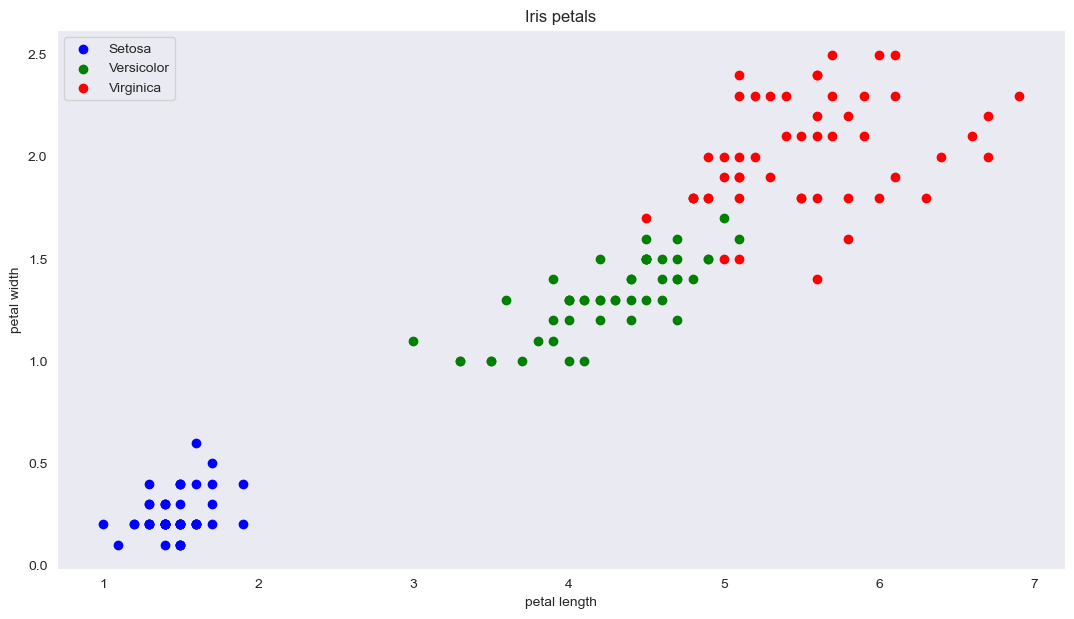

In [5]:
### visualise the dataset
# plot the petal length vs the petal width (a two dimmensional data)

setosa = dataset[dataset.species == "Iris-setosa"]
versicolor = dataset[dataset.species=='Iris-versicolor']
virginica = dataset[dataset.species=='Iris-virginica']
fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot
# lables and scatter points
ax.scatter(setosa['petal length'], setosa['petal width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length'], versicolor['petal width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length'], virginica['petal width'], label="Virginica", facecolor="red")
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

## Generating the Training and Testing datasets

In [6]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [7]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
species         Iris-setosa
dtype: object
Max values of the dataset are: 
sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
species         Iris-virginica
dtype: object
Min values of the scaled dataset are: 
-1.6626185422078956
Max values of the scaled dataset are: 
1.6418617534492592


## Classification

In [8]:
# defining a Multi-layer Perceptron classifier
mlp_clf = MLPClassifier(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=2,
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [9]:
# training the model
mlp_clf.fit(X_train_scaled, y_train)

/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=2, max_iter=300)

### Testing

In [10]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica

### Evaluation

In [11]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   please be aware of the metrics we have and what we can use
#   the f1-score is for binary targets
print(classification_report(y_test, y_pred))

Accuracy: 0.60
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.76      0.86        29
Iris-versicolor       0.00      0.00      0.00        23
 Iris-virginica       0.43      1.00      0.61        23

       accuracy                           0.60        75
      macro avg       0.48      0.59      0.49        75
   weighted avg       0.52      0.60      0.52        75



/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


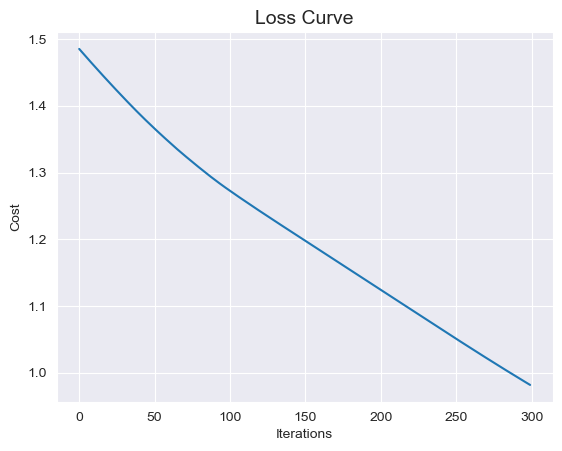

In [12]:
# see how well was the training of the model
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

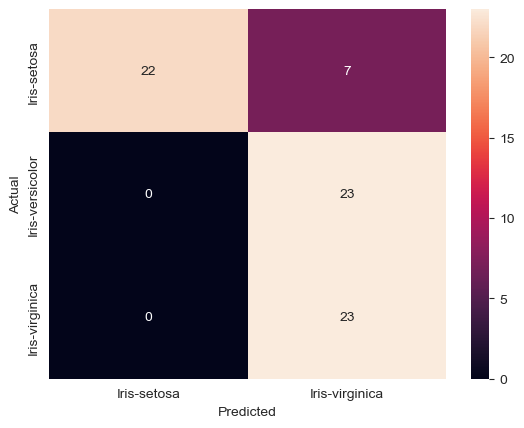

In [13]:
### see how well was the testing of the model

# generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [14]:
# take a look at the predictions
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# take a look at the true examples
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                     0
count               75
unique               2
top     Iris-virginica
freq                53

Groundtruth 
count              75
unique              3
top       Iris-setosa
freq               29
Name: species, dtype: object


## Hyper parameter Tuning

In [15]:
# we can define a set of parameters that we are interested to train with our 
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), 100],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Strength of the L2 regularization term
    # “Regularization is any modification we make to a learning algorithm that 
    #   is intended to reduce its generalization error but not its training 
    #   error.” — Ian Goodfellow
    'alpha': [0.0001, 0.05],
    # a value that works as the temperature in the simulated annealing algorithm
    #   but for the stochastic gradient descent algorithm
    'learning_rate': ['constant','adaptive'],
}

In [16]:
# we define a grid search approach to train several models with Cross-validation

grid = GridSearchCV(
    # the structure of the model we are interest in
    mlp_clf,
    # the different hyper parameters we want to train
    param_grid,
    # use paralelisation. -1 = use all processors
    n_jobs = -1,
    # number of folds use in cross-validation approach
    cv = 5
    )

In [17]:
# execute the hyper parameter tuning
#   this process can take a while
grid.fit(X_train_scaled, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kikin/anaconda3/lib/python3.10/si

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [18]:
# get the best values for each hyper parameter tuned
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}


In [19]:
# save the results as pandas dataframe to easily interact with the data
grid_results = pd.DataFrame(grid.cv_results_)

In [20]:
# show the results of the grid search hyper parameter tuning by best scores
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,0.138410,0.016642,0.000797,0.000302,tanh,0.05,"(150, 100, 50)",adaptive,100,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
8,0.150238,0.027674,0.002198,0.002396,tanh,0.0001,"(150, 100, 50)",adaptive,100,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
67,0.018412,0.003962,0.000542,0.000235,tanh,0.05,100,adaptive,50,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.800000,0.933333,1.000000,1.000000,1.000000,0.946667,0.077746,3
16,0.133826,0.013840,0.001068,0.000685,tanh,0.0001,"(120, 80)",constant,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.866667,1.000000,1.000000,1.000000,0.946667,0.065320,3
22,0.133685,0.027628,0.000729,0.000311,tanh,0.0001,"(120, 80)",adaptive,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.866667,1.000000,1.000000,1.000000,0.946667,0.065320,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.020621,0.003543,0.000885,0.000448,relu,0.05,100,constant,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.600000,0.666667,0.733333,0.466667,0.933333,0.680000,0.154344,139
114,0.095617,0.027125,0.001182,0.000384,relu,0.05,"(150, 100, 50)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.600000,0.333333,0.733333,0.666667,1.000000,0.666667,0.214994,141
138,0.019757,0.007077,0.000504,0.000218,relu,0.05,100,adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.800000,0.600000,0.666667,0.600000,0.666667,0.666667,0.073030,141
72,0.066012,0.015377,0.000509,0.000022,relu,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.600000,0.866667,0.533333,0.666667,0.533333,0.640000,0.123648,143


## Regression

Regression only works with numeric values.

Let's take a look at the original dataset one more time.

In [21]:
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As we can see, the species values are not adequate for this purpose; at least, not until we code them

In [22]:
# here we generate a straight forward coder
def coder(specie):
    if specie == 'Iris-setosa':
        return 0
    elif specie == 'Iris-versicolor':
        return 1
    else:
        return 2

# applying the coder to the feature of interest
dataset['species'] = dataset['species'].apply(coder)

In [23]:
dataset.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

### Generating the Training and Testing datasets

In [24]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning sepal length and sepal width
X = X.to_numpy()[:, (0,1)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [25]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length    4.3
sepal width     2.0
petal length    1.0
petal width     0.1
species         0.0
dtype: float64
Max values of the dataset are: 
sepal length    7.9
sepal width     4.4
petal length    6.9
petal width     2.5
species         2.0
dtype: float64
Min values of the scaled dataset are: 
-2.055362392160273
Max values of the scaled dataset are: 
2.647585454308145


### Defining the regression model

In [26]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=2,
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [27]:
# training the model
mlp_reg.fit(X_train_scaled, y_train)

/Users/kikin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, max_iter=300)

### Testing

In [28]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([ 0.92378801,  0.82948619,  1.60379879,  0.84390533,  1.2753134 ,
        0.3744673 ,  0.56380685,  1.5576873 ,  1.05296099,  0.72357221,
        1.41863682, -0.00624818,  0.43463386,  0.05391838,  0.1249612 ,
        1.23812509,  1.26755986,  0.60323909,  0.64368953,  1.13386187,
       -0.09598892,  0.90407189,  0.09436882,  1.13386187,  2.6263838 ,
        1.37447048,  1.1659897 ,  1.58053819, -0.00624818, -0.01610624,
       -0.20544579,  1.22817503,  1.45077668, -0.04568042, -0.30606279,
        1.09341143,  1.29515689,  0.22456   ,  0.0746527 ,  0.41143095,
        0.72357221,  0.93413344,  1.45077668,  0.52549454,  0.39259826,
        0.54307253,  1.06383725,  1.22870875,  1.32101517,  2.09958423,
        0.63383147,  1.85556828,  0.55394879,  0.15453538,  1.75641119,
        0.72357221,  0.23441806,  0.08451076,  0.1249612 ,  0.23238166,
        1.07369531, -0.04568042,  0.13380106,  0.1742515 ,  0.58352297,
        0.16439344,  0.62397341,  2.51947318, -0.16601355,  0.98

### Evaluation

In [29]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# r2
#   Best possible score is 1.0 and it can be negative 
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

r2: 0.56
mse: 0.30
explained variance: 0.60


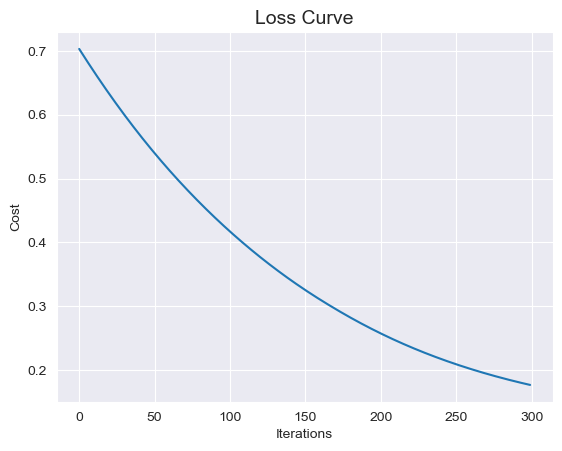

In [30]:
# see how well was the training of the model
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

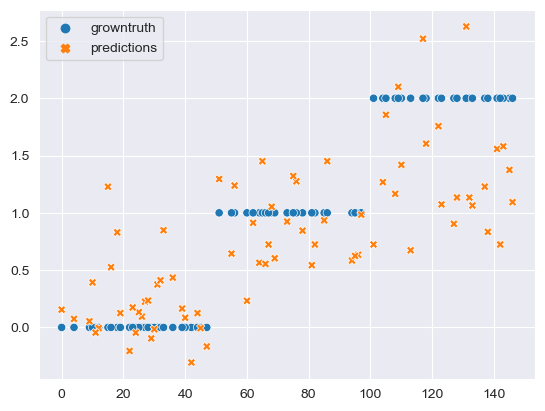

In [31]:
### see how well was the testing of the model

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)